   **CREDIT RISK CLASSIFICATION WITH MACHINE LEARNING**


![Alt text](Photos\Credit-Risk.jpg)

TABLE OF CONTENTS

***1.Introduction***
Defining the business problem.
Stating the goal and importance.

***2.Data Loading***
Loading the credit risk Modeling dataset using pandas.

***3.Exploratory Data Analysis (EDA)***
Inspecting data shape, types, missing values.
Visualizing distributions, correlations, and relationships.
Analyzing the target variable (Credit risk).

***4.Data Preprocessing***
Handling missing values.
Encoding categorical variables.
Scaling/normalizing features if needed.
Spliting data into train/test sets.

***5.Model Building***
Training classification models (e.g., Logistic Regression, Decision Tree, Random Forest).
Tuning hyperparameters if desired.

***6.Model Evaluation***
Evaluate using accuracy, precision, recall, F1-score, ROC-AUC, confusion matrix.
Compare models.

***7.Insights & Recommendations***
Interpreting the results.
Providing actionable business recommendations.
Conclusion


## 1.INTRODUCTION.
### Project Overview
Why would credit risk assessment be so necessary to a whole finacial industry. Its worth noting that one of the most critical challenges for financial institutions is knowing who to advance a credit to and what type of credit- simply put, a wrong loan to a wrong person is disasater in waiting. 
Granting loans to risky applicants can lead losses, strained liquidity, reduced investor confidence and even eventual shut down as defaulted loans dont only hurt profitability but also the going concern of a business.
This project is aimed at using historical applicant data i.e Employment length, credit history, loan intent, income et al to predict the likelihood of loan default. By identifying high-risk applicants in advance, lenders can make various informed decisions e.g adjusting interest rates , applying risk mitigation strategies that protect capital while also ensuring credit accessibility. The project can be used also to continually check the outstanding loans' performance and be able to mitigate any impending/imminent default that may have developed while the loan is being serviced.

### Project Statement
Loan default can pose a very serious financial risk to lending institutions which ultimately leads to loss of revenue, corrodes liquidity/capital and general reputation. Manual methods of assessing applicant's risk can be biased, time consuming and inconsistent, however by building a machine learning model that leverages historical data to predict creditworthiness by accurately identifying high-risk profils, financial institutions will not only streamline their lending process to minimieze exposure of default but also proactively applying risk management strategies.

### General Objective
To develop a data-driven risk prediction model that will be able to classify loan applicant as either low or high risk, using historical applicant information. The aim of the model will help to enhance decision making in loan approvals, monitoring, improve financial stability as well as supporting fair access to credit.

### Stakeholders
-Commercial Banks,Saccos and Microfinance institutions 

-Loan officers and Underwriter 

-Risk and Compliance 

-Credit bureau Analysts 


## 2. DATA UNDERSTANDING AND LOADING
The dataset in use was obtained from [kaggle](https://www.kaggle.com/datasets/laotse/credit-risk-dataset) and contains credit applicants' information sourced from a financial institution's loan book. Every record represents an individual who applied for a loan, alongside associated demographice, financial and credit history

The key feature decriptions:
- **Person_age**: The age of an individual applying for the loan.
- **Person_income**: Annual income of an individual.
- **Person_home_ownership**: The housing status of applicant i.e own, rent or mortgage.
- **Person_emp_length**: Employment period in years.
- **Loan_intent**: The purpose of the loan.
- **Loan_grade**: The assigned credit quality grade.
- **Loan_amnt**:Total amount of loan applied for.
- **Loan_int_rate**: The interest rate offered on the associated loan.
- **Loan_percent_income**: Loan amount as a percentage of income.
- **cb_person_defaul_on_file**: Historical default of the individual as per multiple records e.g credit bureau records (Example being Metropol in Kenya).
- **cb_person_cred_hist_length**: The length of credit history of the individual in years.
- **loan_status**: This is the target variable indicating loan risk i.e 0 being low risk and 1 being high risk

This historical record of loan applicants thats has behavioural, financial habits and creditworthiness includes both institutional risk metrics and personal attributes which will help in identification of patterns associated with loan default. Morever the insights are fundametal for building predictive models that will support responsible lending and ultimately reduce finacial risk.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE


In [13]:
#loading the data
df = pd.read_csv('credit_risk_dataset.csv')

## 3. EXPLORATORY DATA ANALYSIS (EDA)
Inspect data shape, types, and missing values.

Visualize feature distributions and relationships.

Analyze the target variable (e.g., loan_status).

In [16]:
#Data shape.
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
#understanding the data by getting summary statistics
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [18]:
#further understanding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [17]:
#count missing values per column
df.isnull().sum().sort_values(ascending=False)

loan_int_rate                 3116
person_emp_length              895
cb_person_cred_hist_length       0
cb_person_default_on_file        0
loan_percent_income              0
loan_status                      0
loan_amnt                        0
loan_grade                       0
loan_intent                      0
person_home_ownership            0
person_income                    0
person_age                       0
dtype: int64

- **loan_int_rate**: missing values approximately 10%
- **person_emp_length** : 3& missing and may require cleaning

In [3]:
print(df['loan_status'].value_counts())

0    25473
1     7108
Name: loan_status, dtype: int64


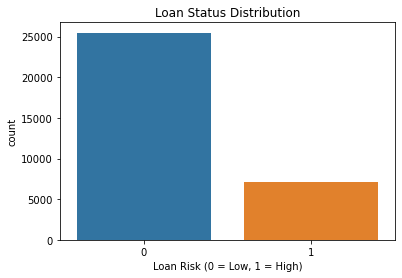

In [24]:
sns.countplot(x='loan_status', data=df)
plt.title("Loan Status Distribution")
plt.xlabel("Loan Risk (0 = Low, 1 = High)")
plt.ylabel("count")
plt.show()